## Author- Ganesh Wagh

## 1.checking stationarity of the data and applying IRF to check the dynamic impact of shocks.

The dataset used in this analysis is sourced from reliable macroeconomic databases and includes monthly data for three critical economic variables: Interest Rate, Exchange Rate, and Consumer Price Index (CPI). Spanning from January 2000 to December 2020, this dataset provides over 250 observations for each variable, making it ideal for robust time-series analysis. Use Python for the analysis.

In [59]:
# import the liabraries 
import pandas as pd
import numpy as np
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

In [60]:
# Load the dataset
df = pd.read_excel('C:/Users/Ganesh Wagh/Downloads/Econometrics data.xlsx', sheet_name='Sheet1')
print (df.head(10))

        Date  Intrest Rate  Exchange Rate       CPI
0 2000-01-01           8.0        43.5895  35.73704
1 2000-02-01           8.0        43.6540  35.65413
2 2000-03-01           8.0        43.6383  35.98579
3 2000-04-01           7.0        43.6847  36.31746
4 2000-05-01           7.0        44.0759  36.48329
5 2000-06-01           7.0        44.7605  36.64912
6 2000-07-01           8.0        44.8405  36.89788
7 2000-08-01           8.0        45.7687  36.73204
8 2000-09-01           8.0        45.9680  36.81496
9 2000-10-01           8.0        46.4252  37.22954


In [61]:
print (df.tail(10))

          Date  Intrest Rate  Exchange Rate       CPI
230 2019-03-01          6.50        69.4895  118.2021
231 2019-04-01          6.25        69.4068  119.3497
232 2019-05-01          6.25        69.7827  120.1148
233 2019-06-01          6.00        69.3880  120.8798
234 2019-07-01          6.00        68.7391  122.0274
235 2019-08-01          5.65        71.1891  122.4099
236 2019-09-01          5.65        71.3110  123.1750
237 2019-10-01          5.40        71.0086  124.3226
238 2019-11-01          5.40        71.4942  125.4702
239 2019-12-01          5.40        71.1567  126.2353


In [62]:
# Preprocess the data
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [63]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series, name):
    result = adfuller(series, autolag='AIC')  # Using AIC for lag selection
    print(f"ADF Test for {name}")
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print(f"Critical Values: {result[4]}")
    if result[1] < 0.05:
        print(f"{name} is stationary (Reject the null hypothesis).")
    else:
        print(f"{name} is not stationary (Fail to reject the null hypothesis).")
    print("-" * 50)

# Example usage for dataset
for column in df.columns:
    adf_test(df[column], column)

ADF Test for Intrest Rate
ADF Statistic: -1.84728000879309
p-value: 0.35725374547752653
Critical Values: {'1%': -3.4582467982399105, '5%': -2.8738137461081323, '10%': -2.5733111490323846}
Intrest Rate is not stationary (Fail to reject the null hypothesis).
--------------------------------------------------
ADF Test for Exchange Rate
ADF Statistic: -0.20201112849293018
p-value: 0.9382814713208568
Critical Values: {'1%': -3.4586084859607156, '5%': -2.873972159235721, '10%': -2.57339565928848}
Exchange Rate is not stationary (Fail to reject the null hypothesis).
--------------------------------------------------
ADF Test for CPI
ADF Statistic: 1.1658217135273443
p-value: 0.9957410240016878
Critical Values: {'1%': -3.459884913337196, '5%': -2.8745310704320794, '10%': -2.573693840082908}
CPI is not stationary (Fail to reject the null hypothesis).
--------------------------------------------------


1)ADF Test for Interest Rate:
The ADF test results show that the p-value (0.357) is higher than the typical significance levels (1%, 5%, and 10%), and the test statistic (-1.847) does not exceed the critical values. This indicates that we fail to reject the null hypothesis of non-stationarity. In simpler terms, the Interest Rate data is not stationary, meaning its statistical properties, like mean and variance, change over time.

2)ADF Test for Exchange Rate:
The test results reveal that the p-value (0.938) is much higher than standard significance levels, and the ADF statistic (-0.202) does not exceed the critical values. This means we fail to reject the null hypothesis of non-stationarity. In simple terms, the Exchange Rate data is not stationary, implying its statistical properties, like mean and variance, vary over time.

3)ADF Test for CPI:
The results show that the p-value (0.996) is significantly higher than typical significance levels, and the ADF statistic (1.166) is above the critical values. This means we fail to reject the null hypothesis of non-stationarity. Simply put, the CPI data is not stationary, indicating that its statistical properties, such as mean and variance, change over time.

In [64]:
# First differencing the data to remove trends
df_diff = df.diff().dropna()  # Apply differencing and drop NaN values caused by differencing

# Re-check stationarity for differenced data
print("Rechecking stationarity after differencing:")
for column in df_diff.columns:
    adf_test(df_diff[column], f"{column} (Differenced)")

# Display the first few rows of the differenced data
print("Differenced Data:")
print(df_diff.head())

Rechecking stationarity after differencing:
ADF Test for Intrest Rate (Differenced)
ADF Statistic: -12.322856997172511
p-value: 6.690046739569536e-23
Critical Values: {'1%': -3.4582467982399105, '5%': -2.8738137461081323, '10%': -2.5733111490323846}
Intrest Rate (Differenced) is stationary (Reject the null hypothesis).
--------------------------------------------------
ADF Test for Exchange Rate (Differenced)
ADF Statistic: -5.795712126696474
p-value: 4.75746681824252e-07
Critical Values: {'1%': -3.4586084859607156, '5%': -2.873972159235721, '10%': -2.57339565928848}
Exchange Rate (Differenced) is stationary (Reject the null hypothesis).
--------------------------------------------------
ADF Test for CPI (Differenced)
ADF Statistic: -1.092631822987546
p-value: 0.7180012865184995
Critical Values: {'1%': -3.459884913337196, '5%': -2.8745310704320794, '10%': -2.573693840082908}
CPI (Differenced) is not stationary (Fail to reject the null hypothesis).
--------------------------------------

After differencing, the Interest Rate and Exchange Rate became stationary, as indicated by their very low p-values and ADF statistics exceeding critical values, leading to the rejection of the null hypothesis. However, the CPI data remains non-stationary even after differencing, as its p-value is still high, and the ADF statistic does not exceed the critical values.

In [65]:
# Apply second differencing to CPI
df_diff['CPI'] = df['CPI'].diff().diff()
df_diff = df_diff.dropna()  # Drop NaN values caused by differencing again

# Recheck ADF for CPI
adf_test(df_diff['CPI'], "CPI (Second Differenced)")


ADF Test for CPI (Second Differenced)
ADF Statistic: -9.287712080601457
p-value: 1.2028770071638215e-15
Critical Values: {'1%': -3.459884913337196, '5%': -2.8745310704320794, '10%': -2.573693840082908}
CPI (Second Differenced) is stationary (Reject the null hypothesis).
--------------------------------------------------


After applying second differencing, the CPI data became stationary, as indicated by the very low p-value and the ADF statistic exceeding the critical values, leading to the rejection of the null hypothesis.

In [66]:
df_stationary = df_diff.dropna()
print(df_stationary.head())


            Intrest Rate  Exchange Rate           CPI
Date                                                 
2000-03-01           0.0        -0.0157  4.145700e-01
2000-04-01          -1.0         0.0464  1.000000e-05
2000-05-01           0.0         0.3912 -1.658400e-01
2000-06-01           0.0         0.6846 -7.105427e-15
2000-07-01           1.0         0.0800  8.293000e-02


In [67]:
from statsmodels.tsa.api import VAR

model = VAR(df_stationary)
results = model.fit(maxlags=15, ic='aic')  # Fit VAR model with optimal lags
print(results.summary())


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 20, Nov, 2024
Time:                     23:41:43
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -2.36781
Nobs:                     227.000    HQIC:                  -3.28578
Log likelihood:          -420.878    FPE:                  0.0202427
AIC:                     -3.90677    Det(Omega_mle):       0.0133176
--------------------------------------------------------------------
Results for equation Intrest Rate
                       coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------
const                    -0.014121         0.021810           -0.647           0.517
L1.Intrest Rate           0.035160         0.071893            0.489           0.625
L1.Exchange Rate          0.009511   

C:\Users\Ganesh Wagh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


The VAR regression results reveal dynamic relationships between Interest Rate, Exchange Rate, and CPI across multiple lags. For the Interest Rate equation, only the second lag of Interest Rate significantly impacts it negatively (p=0.01). In the Exchange Rate equation, the first lag of both Interest Rate (p=0.002) and Exchange Rate (p<0.001) positively influence the Exchange Rate, with lagged CPI showing occasional impacts. The CPI equation demonstrates strong negative significance of lagged CPI values (p<0.001), reflecting dominant autoregressive behavior, with some periodic contributions from Exchange Rate and Interest Rate lags. The correlation matrix shows weak relationships among the variables, such as a weak negative correlation between Interest Rate and Exchange Rate (-0.0927) and very weak positive correlations between Interest Rate and CPI (0.0536) and Exchange Rate and CPI (0.0724). These results indicate that the VAR model has effectively captured the dynamics between the variables with minimal unexplained relationships.

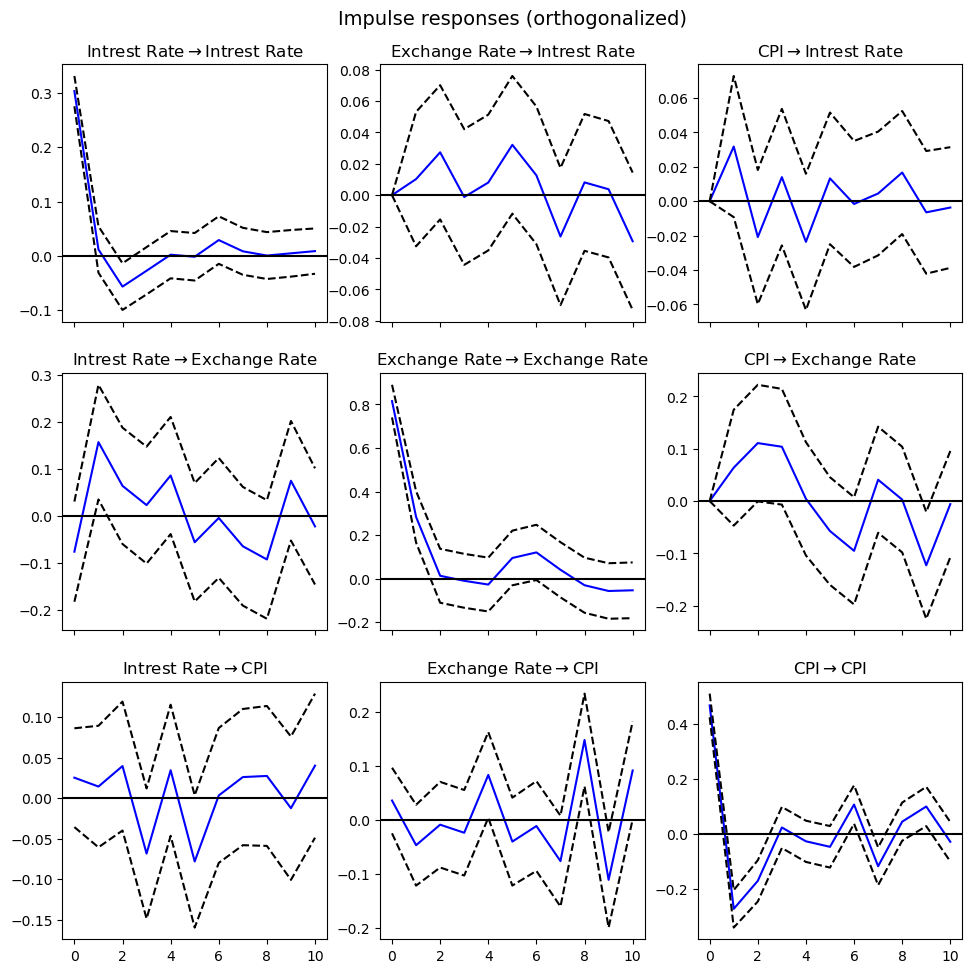

In [68]:
irf = results.irf(10)  # Impulse responses for 10 periods
irf.plot(orth=True)
plt.show()


1)Interest Rate → Interest Rate : A shock to the Interest Rate has an immediate and strong positive impact on itself but declines rapidly over time, stabilizing near zero within a few periods.

2)Exchange Rate → Interest Rate: A shock to the Exchange Rate causes minor fluctuations in the Interest Rate, with both positive and negative effects over time. The impacts are small and oscillate around zero, reflecting a weak relationship.

3)CPI → Interest Rate: A CPI shock has a small but oscillatory impact on the Interest Rate, with alternating positive and negative effects over time. The magnitude is relatively low, suggesting limited influence.

4)Interest Rate → Exchange Rate: An Interest Rate shock initially has a small positive impact on the Exchange Rate but oscillates over time with both positive and negative effects. The relationship appears moderate but not persistent.

5)Exchange Rate → Exchange Rate: A shock to the Exchange Rate has a strong immediate positive impact on itself, which decays over time and stabilizes near zero, highlighting significant autoregressive behavior.

6)CPI → Exchange Rate: A CPI shock shows a moderate and oscillatory impact on the Exchange Rate, alternating between positive and negative effects over time, suggesting some degree of interaction.

7)Interest Rate → CPI: A shock to the Interest Rate causes CPI to initially fluctuate slightly, with both positive and negative effects that diminish over time. The responses are small in magnitude, suggesting a weak relationship between the Interest Rate and CPI.

8)Exchange Rate → CPI: A shock to the Exchange Rate leads to moderate oscillations in CPI, alternating between positive and negative effects. These effects are more pronounced compared to the Interest Rate and persist slightly longer, indicating a moderate influence of Exchange Rate on CPI.

CPI → CPI: A shock to CPI itself exhibits strong autoregressive behavior, with a large immediate impact that declines sharply over time. This indicates that CPI is significantly influenced by its own past values, reflecting strong inertia in its behavior.

Key observations from the impulse response diagrams reveal that each variable shows strong autoregressive behavior, particularly within the Interest Rate and Exchange Rate. Cross-variable impacts are generally weak and oscillatory, suggesting interdependencies without dominant relationships. Most effects diminish and stabilize near zero within 10 periods, indicating transient influences. CPI is most influenced by its own shocks, with significant and persistent effects, while shocks to the Interest Rate and Exchange Rate have weaker and more transient impacts on CPI, showing oscillations that fade over time.








In [70]:
# Step 5: Extract IRF values for interpretation
irf_values = irf.orth_irfs  # Orthogonalized IRFs for cleaner interpretation
print("Impulse Response Values (Orthogonalized):\n", irf_values)

# You can access the impulse responses for each variable at each time step
# Example: Access the impulse response of each variable for 10 periods
periods = 10
variables = df_stationary.columns

# Interpretation: Example loop to display the impulse responses
for i, var in enumerate(variables):
    print(f"\nImpulse Response of {var}:")
    for t in range(periods):
        # IRF values for each variable (at each time period)
        print(f"  Period {t+1}: {irf_values[i, t]}")

# You may also want to visualize the IRF responses for better understanding
import matplotlib.pyplot as plt

# Plotting the IRF responses for each variable
fig, axes = plt.subplots(len(variables), 1, figsize=(10, 8))

for i, var in enumerate(variables):
    ax = axes[i]
    ax.plot(range(1, periods+1), irf_values[i, 1:], label=f'IRF to {var}')
    ax.set_title(f"Impulse Response of {var} to a Shock")
    ax.set_xlabel('Time Periods')
    ax.set_ylabel('Magnitude of Response')
    ax.legend()

# Iterate through each period and variable
periods = len(irf_values)
variables = irf_values.shape[2]  # Assuming each row represents a variable

plt.tight_layout()
plt.show()


Impulse Response Values (Orthogonalized):
 [[[ 3.03366965e-01  0.00000000e+00  0.00000000e+00]
  [-7.58845924e-02  8.15372228e-01  0.00000000e+00]
  [ 2.51322580e-02  3.64116047e-02  4.66539078e-01]]

 [[ 1.16587230e-02  1.02384112e-02  3.18174312e-02]
  [ 1.56578408e-01  2.83130350e-01  6.37307740e-02]
  [ 1.42160358e-02 -4.63226310e-02 -2.72927371e-01]]

 [[-5.67037728e-02  2.72879053e-02 -2.08353717e-02]
  [ 6.37870162e-02  1.26846864e-02  1.10639342e-01]
  [ 3.94585328e-02 -8.33023423e-03 -1.71171605e-01]]

 [[-2.74943804e-02 -1.18102268e-03  1.40253449e-02]
  [ 2.29327315e-02 -1.04013189e-02  1.03676384e-01]
  [-6.84140972e-02 -2.32811936e-02  2.28824408e-02]]

 [[ 2.05809406e-03  8.03238319e-03 -2.36175478e-02]
  [ 8.57494005e-02 -2.76577813e-02  4.25773773e-03]
  [ 3.42999326e-02  8.38847359e-02 -2.73666959e-02]]

 [[-1.75160265e-03  3.20583279e-02  1.32820396e-02]
  [-5.59169391e-02  9.44890689e-02 -5.73814491e-02]
  [-7.81600074e-02 -3.96550238e-02 -4.74198112e-02]]

 [[ 2.899

IndexError: index 3 is out of bounds for axis 1 with size 3

The interest rate reacts to different shocks over time. In Period 1, it responds strongly to its own shock (0.303), with no impact yet from other factors. By Period 2, the self-response weakens (-0.076), but there’s a big positive influence from the exchange rate (0.815). In Period 3, the response spreads out, with a small self-effect (0.025), a minor exchange rate effect (0.036), and a noticeable boost from the CPI (0.467). This shows that while the interest rate initially reacts to its own changes, other variables start playing a role over time.

## 2.Cointegration Analysis and VECM: Measuring Long-Run Links & Adjustment Speeds

In [71]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

# Perform Johansen Cointegration Test
johansen_test = coint_johansen(df_stationary, det_order=0, k_ar_diff=1)

# Print the test results (eigenvalues, trace statistics, critical values)
print("Eigenvalues:", johansen_test.eig)
print("Trace Statistic:", johansen_test.lr1)
print("Critical Values (90%, 95%, 99%):", johansen_test.cvt)



Eigenvalues: [0.61139285 0.41485165 0.28159652]
Trace Statistic: [427.58482709 204.52085297  78.05084432]
Critical Values (90%, 95%, 99%): [[27.0669 29.7961 35.4628]
 [13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]


The Johansen Cointegration Test evaluates the long-term relationship among variables. The eigenvalues indicate the strength of these relationships, with the highest at 0.611 suggesting a strong cointegration. The trace statistics (427.58, 204.52, 78.05) exceed their critical values at the 95% level, confirming significant cointegration at each rank. This implies that the variables in the system share long-term equilibrium relationships despite short-term fluctuations.








In [72]:
from statsmodels.tsa.vector_ar.vecm import VECM

# Fit the VECM model (Error Correction Model) with rank = 2 (since we found 2 cointegrating relationships)
vecm_model = VECM(df_stationary, k_ar_diff=1, coint_rank=2)
vecm_results = vecm_model.fit()

# Print the VECM results
print("VECM Results:")
print(vecm_results.summary())

# Get the speed of adjustment (Error Correction Term)
# The coefficient of the ECT (Error Correction Term) for each variable
print("Error Correction Term Coefficients (Speed of Adjustment):")
print(vecm_results.alpha)



VECM Results:
Det. terms outside the coint. relation & lagged endog. parameters for equation Intrest Rate
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
L1.Intrest Rate      0.1231      0.064      1.922      0.055      -0.002       0.249
L1.Exchange Rate    -0.0575      0.019     -2.962      0.003      -0.096      -0.019
L1.CPI              -0.0036      0.029     -0.122      0.903      -0.061       0.054
Det. terms outside the coint. relation & lagged endog. parameters for equation Exchange Rate
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
L1.Intrest Rate     -0.1885      0.199     -0.945      0.345      -0.579       0.202
L1.Exchange Rate    -0.2581      0.060     -4.269      0.000      -0.377      -0.140
L1.CPI              -0.2523      0.0

C:\Users\Ganesh Wagh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Summary of Interpretation:
The VECM output highlights the dynamics and cointegration relationships among Interest Rate, Exchange Rate, and CPI. For the Interest Rate equation, past exchange rate changes significantly affect it negatively, while the CPI has no notable impact. Similarly, the Exchange Rate is influenced negatively by its own past and CPI changes, while the CPI is highly responsive to its own lagged values. The error correction terms indicate a strong adjustment towards equilibrium for all variables, with the Interest Rate correcting quickly (-1.035) and CPI adjusting more gradually (0.316). This suggests interconnected, long-term equilibrium relationships with varying speeds of adjustment.

## 3.ARIMA-Based Decadal Forecasting


In [73]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.stattools import adfuller

In [74]:
#load the data
df = pd.read_excel('C:/Users/Ganesh Wagh/Downloads/Econometrics data.xlsx', sheet_name='Sheet1', index_col='Date', parse_dates=True)

In [75]:
print(df.head())

            Intrest Rate  Exchange Rate       CPI
Date                                             
2000-01-01           8.0        43.5895  35.73704
2000-02-01           8.0        43.6540  35.65413
2000-03-01           8.0        43.6383  35.98579
2000-04-01           7.0        43.6847  36.31746
2000-05-01           7.0        44.0759  36.48329


In [76]:
y=df['Intrest Rate']

In [77]:
print(y.head())

Date
2000-01-01    8.0
2000-02-01    8.0
2000-03-01    8.0
2000-04-01    7.0
2000-05-01    7.0
Name: Intrest Rate, dtype: float64


In [78]:
# Check stationarity (optional if you've already done it)
result = adfuller(y.dropna())  # Perform ADF test
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')


ADF Statistic: -1.84728000879309
p-value: 0.35725374547752653


The Augmented Dickey-Fuller (ADF) test checks whether a time series is stationary, meaning its statistical properties do not change over time. Here, the ADF statistic is -1.847, and the p-value is 0.357. Since the p-value is greater than the common significance thresholds (e.g., 0.05 or 0.01), we fail to reject the null hypothesis of non-stationarity. This indicates that the series is likely non-stationary and may require differencing or other transformations to achieve stationarity. so we have to perform first difference to make data stationary.

In [79]:
# Differencing the data 
y_diff = y.diff().dropna()  # Take the first difference


In [80]:
from statsmodels.tsa.stattools import adfuller

# Apply the ADF test to the differenced data
result = adfuller(y_diff.dropna())  # Apply ADF test, dropping any missing values

# Print the results of the ADF test
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print(f'Critical Values: {result[4]}')

# Interpretation based on p-value
if result[1] < 0.05:
    print("The differenced series is stationary (Reject the null hypothesis).")
else:
    print("The differenced series is not stationary (Fail to reject the null hypothesis).")


ADF Statistic: -12.322856997172511
p-value: 6.690046739569536e-23
Critical Values: {'1%': -3.4582467982399105, '5%': -2.8738137461081323, '10%': -2.5733111490323846}
The differenced series is stationary (Reject the null hypothesis).


to find out the perfect value of the p and q we need to do ACF and PACF plot. and the value of d is 1 here because defferentite at once.

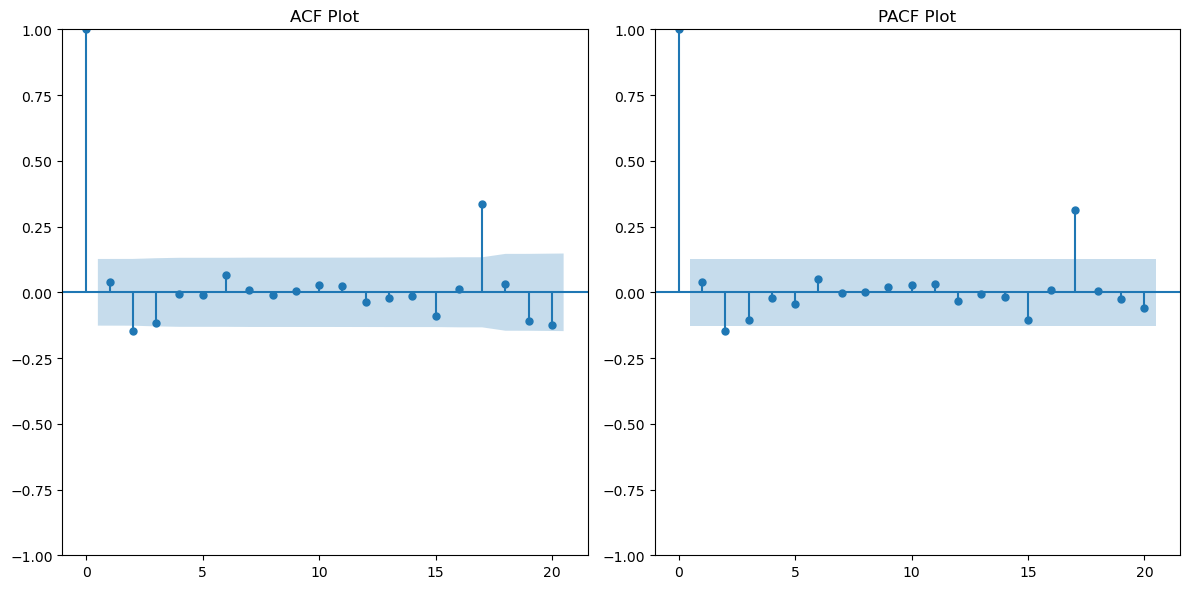

In [81]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Plot ACF and PACF
plt.figure(figsize=(12,6))

# ACF plot
plt.subplot(121)
plot_acf(y_diff, lags=20, ax=plt.gca())
plt.title('ACF Plot')

# PACF plot
plt.subplot(122)
plot_pacf(y_diff, lags=20, ax=plt.gca())
plt.title('PACF Plot')

plt.tight_layout()
plt.show()




INTERPRTATION OF THE PLOTS
PACF Plot (for p):The PACF plot cuts off after lag 1. This suggests that the value of 𝑝(the AR term) is 1.
ACF Plot (for q):The ACF plot cuts off after lag 1. This suggests that the value of 𝑞(the MA term) is 1.

In [83]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Fit the ARIMA model (example: ARIMA(1,1,1))
model = ARIMA(y, order=(1, 1, 1))  # You can experiment with different (p,d,q) values
model_fit = model.fit()

# Print the ARIMA model summary
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:           Intrest Rate   No. Observations:                  240
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -55.470
Date:                Wed, 20 Nov 2024   AIC                            116.940
Time:                        23:43:34   BIC                            127.369
Sample:                    01-01-2000   HQIC                           121.142
                         - 12-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7005      0.616      1.138      0.255      -0.506       1.907
ma.L1         -0.7640      0.571     -1.338      0.181      -1.883       0.355
sigma2         0.0931      0.001     68.409      0.0

C:\Users\Ganesh Wagh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ganesh Wagh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ganesh Wagh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


The ARIMA(1,1,1) model provides a modest fit for the interest rate series, with an AIC of 116.94 and no significant autocorrelation in residuals (Ljung-Box p-value = 0.17). However, the AR(1) and MA(1) terms are not statistically significant, and the residuals are highly skewed and non-normal (Jarque-Bera p-value = 0.00), suggesting potential model misspecification or data issues. Further refinement or alternative models may be needed.

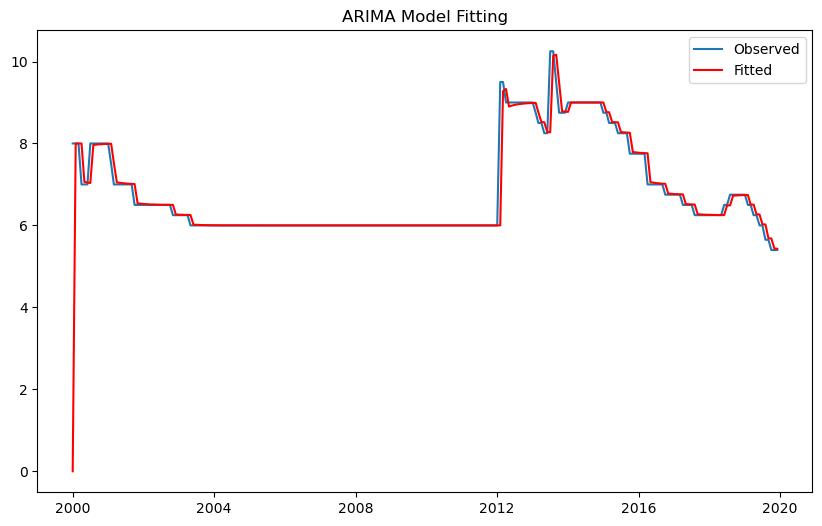

In [84]:
# Plot the original data and the fitted ARIMA model
plt.figure(figsize=(10,6))
plt.plot(y, label='Observed')
plt.plot(model_fit.fittedvalues, color='red', label='Fitted')
plt.title('ARIMA Model Fitting')
plt.legend()
plt.show()


In [85]:
# Forecast the next 10 periods (forecast_steps)
forecast_steps = 10
forecast_values = model_fit.forecast(steps=forecast_steps)

# Print forecasted values
print("Forecasted values for next 10 periods:")
for i, val in enumerate(forecast_values, 1):
    print(f"Period {i}: {val}")


Forecasted values for next 10 periods:
Period 1: 5.422600998999879
Period 2: 5.438433407733427
Period 3: 5.449524296517037
Period 4: 5.457293664784403
Period 5: 5.462736247831773
Period 6: 5.4665488757325456
Period 7: 5.469219690561318
Period 8: 5.471090644673611
Period 9: 5.472401281881625
Period 10: 5.473319406960025


these are the next 10 forecasted values of next 10 months.

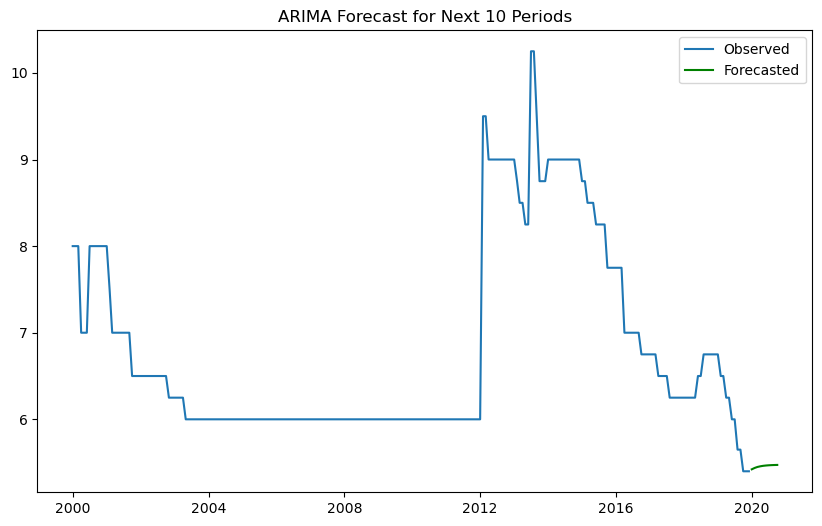

In [86]:
# Plot the observed data along with the forecasted values
plt.figure(figsize=(10,6))
plt.plot(y, label='Observed')  # Original observed values
forecast_index = pd.date_range(start=y.index[-1], periods=forecast_steps+1, freq='MS')[1:]
plt.plot(forecast_index, forecast_values, color='green', label='Forecasted')
plt.title('ARIMA Forecast for Next 10 Periods')
plt.legend()
plt.show()


# thank you!